![NYC Skyline](nyc.jpg)

Welcome to New York City, one of the most-visited cities in the world. There are many Airbnb listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. In this project, we will take a closer look at the New York Airbnb market by combining data from multiple file types like `.csv`, `.tsv`, and `.xlsx`.

Recall that **CSV**, **TSV**, and **Excel** files are three common formats for storing data. 
Three files containing data on 2019 Airbnb listings are available to you:

**data/airbnb_price.csv**
This is a CSV file containing data on Airbnb listing prices and locations.
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

As a consultant working for a real estate start-up, you have collected Airbnb listing data from various sources to investigate the short-term rental market in New York. You'll analyze this data to provide insights on private rooms to the real estate company.

There are three files in the data folder: airbnb_price.csv, airbnb_room_type.xlsx, airbnb_last_review.tsv.

* What are the dates of the earliest and most recent reviews? Store these values as two separate variables with your preferred names.

* How many of the listings are private rooms? Save this into any variable.

* What is the average listing price? Round to the nearest two decimal places and save into a variable.

* Combine the new variables into one DataFrame called review_dates with four columns in the following order: first_reviewed, last_reviewed, nb_private_rooms, and avg_price. The DataFrame should only contain one row of values.

# read the data

In [2]:
# read the "airbnb_price.csv" file
airbnb_price = pd.read_csv("data/airbnb_price.csv")
airbnb_price.head()

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"


In [3]:
# read the "airbnb_room_type.xlsx" file
airbnb_room_type = pd.read_excel("data/airbnb_room_type.xlsx")
airbnb_room_type.head()

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [4]:
# read the "airbnb_last_review.tsv" file
airbnb_last_review = pd.read_csv("data/airbnb_last_review.tsv", sep='\t')
airbnb_last_review

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019
...,...,...,...
25204,36425863,Rusaa,July 07 2019
25205,36427429,H Ai,July 07 2019
25206,36438336,Ben,July 07 2019
25207,36442252,Blaine,July 07 2019


# join the three dataframes

In [5]:
# Merge airbnb_price and airbnb_room_type on 'listing_id'
merged_df = pd.merge(airbnb_price, airbnb_room_type, on='listing_id')

# Merge the result with airbnb_last_review on 'listing_id'
df = pd.merge(merged_df, airbnb_last_review, on='listing_id')
df.head()

,listing_id,price,nbhood_full,description,room_type,host_name,last_review
0,2595,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt,Jennifer,May 21 2019
1,3831,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt,LisaRoxanne,July 05 2019
2,5099,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Chris,June 22 2019
3,5178,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Shunichi,June 24 2019
4,5238,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Ben,June 09 2019


# perform EDA and Data cleaning

In [6]:
# look at the dataframe information summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25209 entries, 0 to 25208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
 3   description  25199 non-null  object
 4   room_type    25209 non-null  object
 5   host_name    25201 non-null  object
 6   last_review  25209 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.5+ MB


In [7]:
# look at the data types of the dataframe columns 
df.dtypes

listing_id      int64
price          object
nbhood_full    object
description    object
room_type      object
host_name      object
last_review    object
dtype: object

In [8]:
# see how many null values in each column
df.isna().sum()

listing_id      0
price           0
nbhood_full     0
description    10
room_type       0
host_name       8
last_review     0
dtype: int64

In [9]:
# Print the rows where host_name column is null (doesn't affect the ana;ysis)
df[df['host_name'].isna()]

,listing_id,price,nbhood_full,description,room_type,host_name,last_review
263,100184,50 dollars,"Queens, Queens Village",Bienvenue,private room,NaN,July 08 2019
3040,4183989,86 dollars,"Manhattan, Harlem",SPRING in the City!! Zen-Style Tranquil Bedroom,Private room,NaN,May 23 2019
4039,6292866,85 dollars,"Brooklyn, East Flatbush",Modern Quiet Gem Near All,entire home/apt,NaN,June 19 2019
4269,6786181,100 dollars,"Brooklyn, East Flatbush",R&S Modern Spacious Hideaway,Entire home/apt,NaN,June 19 2019
6338,12113879,220 dollars,"Manhattan, Chelsea","Sunny, Large West Village 1 BR Near Everything",Entire home/apt,NaN,July 02 2019
8060,15648096,75 dollars,"Bronx, Highbridge",Spacious 2 bedroom close to Manhattan,Entire home/apt,NaN,July 07 2019
12128,21867710,120 dollars,"Manhattan, Hell's Kitchen",Amazing room in the centre on Manhatten! Welcome!,Private room,NaN,January 01 2019
12164,21901156,120 dollars,"Manhattan, Hell's Kitchen",Best Deal! Lovely place in Manhattan! Time Squ...,Private room,NaN,January 01 2019


In [10]:
# Print the rows where description column is null (doesn't affect the analysis)
df[df['description'].isna()]

,listing_id,price,nbhood_full,description,room_type,host_name,last_review
4688,7851219,60 dollars,"Brooklyn, Williamsburg",NaN,PRIVATE ROOM,John,June 18 2019
4690,7854307,60 dollars,"Brooklyn, Williamsburg",NaN,private room,John,June 15 2019
4696,7858673,60 dollars,"Brooklyn, Williamsburg",NaN,Private room,John,June 08 2019
4707,7873655,60 dollars,"Brooklyn, Williamsburg",NaN,PRIVATE ROOM,John,June 21 2019
4709,7886635,60 dollars,"Brooklyn, Williamsburg",NaN,Private room,John,June 18 2019
4717,7901635,60 dollars,"Brooklyn, Williamsburg",NaN,Private room,John,June 23 2019
4829,8192443,60 dollars,"Brooklyn, Williamsburg",NaN,private room,John,June 23 2019
4901,8341556,55 dollars,"Manhattan, Harlem",NaN,Private room,Gordon M,May 26 2019
5496,9698992,62 dollars,"Manhattan, Harlem",NaN,private room,Gordon M,June 14 2019
11986,21733545,175 dollars,"Manhattan, Hell's Kitchen",NaN,Private room,Sybilla Michelle,June 30 2019


In [11]:
# Convert the last_review column to datetime format (day-month-year)
df['last_review'] = pd.to_datetime(df['last_review'], format='%B %d %Y')
df.head()

,listing_id,price,nbhood_full,description,room_type,host_name,last_review
0,2595,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt,Jennifer,2019-05-21
1,3831,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt,LisaRoxanne,2019-07-05
2,5099,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Chris,2019-06-22
3,5178,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Shunichi,2019-06-24
4,5238,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Ben,2019-06-09


In [12]:
# convert the price column to float datatype 
df["price"] = df["price"].str.replace("dollars", "").str.strip() # run it only once
df["price"] = df["price"].astype("float")
df.head()

,listing_id,price,nbhood_full,description,room_type,host_name,last_review
0,2595,225.0,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt,Jennifer,2019-05-21
1,3831,89.0,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt,LisaRoxanne,2019-07-05
2,5099,200.0,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Chris,2019-06-22
3,5178,79.0,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Shunichi,2019-06-24
4,5238,150.0,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Ben,2019-06-09


In [13]:
# look at the distrbution of values in the room_type column 
df["room_type"].value_counts()

Entire home/apt    8458
Private room       7241
entire home/apt    2665
private room       2248
ENTIRE HOME/APT    2143
PRIVATE ROOM       1867
Shared room         380
shared room         110
SHARED ROOM          97
Name: room_type, dtype: int64

In [14]:
# there is capitalization problem in the room_type column
df['room_type'] = df['room_type'].str.lower()
df["room_type"].value_counts()

entire home/apt    13266
private room       11356
shared room          587
Name: room_type, dtype: int64

## What are the dates of the earliest and most recent reviews? Store these values as two separate variables with your preferred names.

In [15]:
# Sort the dataframe by last_review in ascending order and take the earliest date
first_reviewed = df.sort_values(by='last_review', ascending=True).iloc[0]['last_review']
first_reviewed

Timestamp('2019-01-01 00:00:00')

In [16]:
# Sort the dataframe by last_review in ascending order and take the most recent date
last_reviewed = df.sort_values(by='last_review', ascending=False).iloc[0]['last_review']
last_reviewed

Timestamp('2019-07-09 00:00:00')

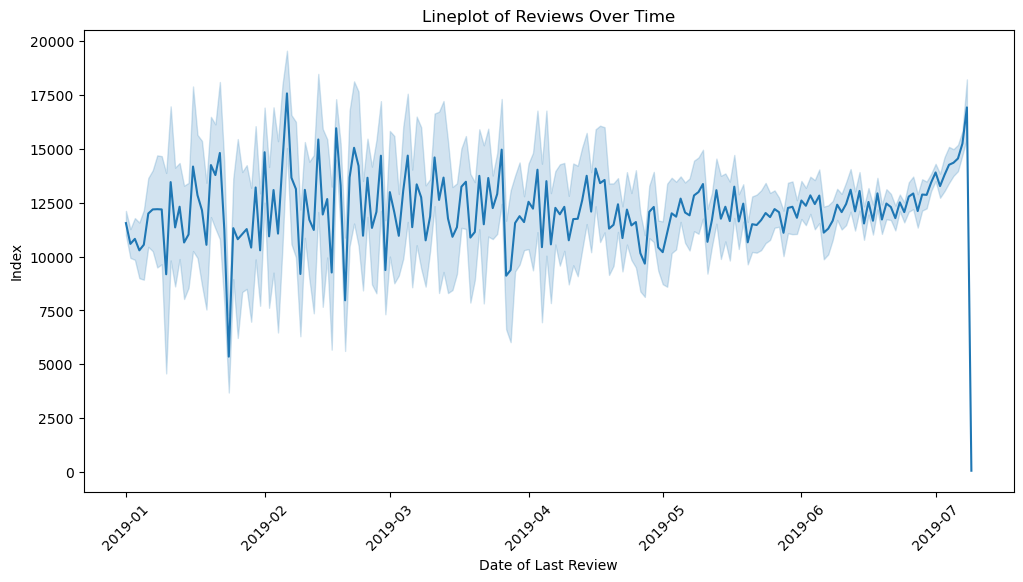

In [17]:
# Set the figure size for better readability, Create a lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='last_review', y=df.index)

# Set the title and labels
plt.title('Lineplot of Reviews Over Time')
plt.xlabel('Date of Last Review')
plt.ylabel('Index')
plt.xticks(rotation=45)
plt.show()

## How many of the listings are private rooms? Save this into any variable.

In [18]:
# look at the room_type column distrbution
df["room_type"].value_counts(dropna=False)

entire home/apt    13266
private room       11356
shared room          587
Name: room_type, dtype: int64

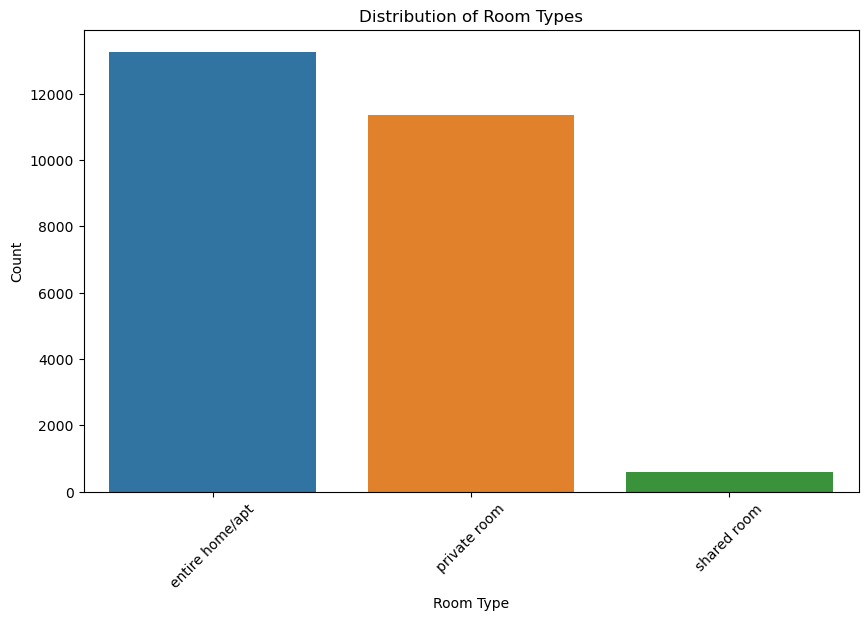

In [19]:
# Get the value counts of room_type
room_type_counts = df["room_type"].value_counts(dropna=False).reset_index()
room_type_counts.columns = ['room_type', 'count']

# Create a seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='count', data=room_type_counts)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [20]:
# extrect number of Private room exist in the dataframe
nb_private_rooms = df["room_type"].value_counts(dropna=False).loc["private room"]
nb_private_rooms

11356

## What is the average listing price? Round to the nearest two decimal places and save into a variable.

In [21]:
# get the average listing price of the whole dataframe
avg_price = df["price"].mean()
avg_price

141.7779364512674

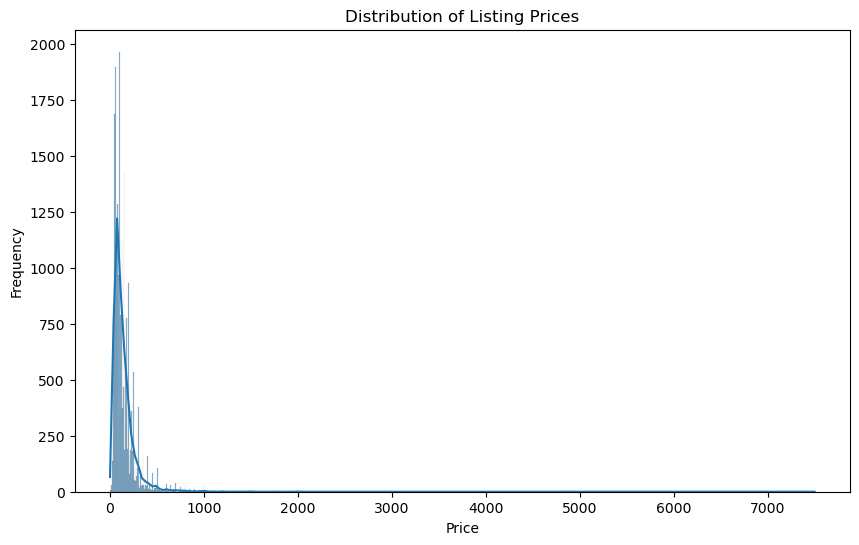

In [22]:
# Create a seaborn distribution plot for the avg_price column
plt.figure(figsize=(10, 6))
sns.histplot(df["price"], kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Create the needed dataframe 

In [23]:
review_dates = pd.DataFrame({
    'first_reviewed': [first_reviewed],
    'last_reviewed': [last_reviewed],
    'nb_private_rooms': [nb_private_rooms],
    'avg_price': [round(avg_price, 2)]
})
review_dates

,first_reviewed,last_reviewed,nb_private_rooms,avg_price
0,2019-01-01,2019-07-09,11356,141.78


# Please do not forget to share the support with a love on the project